In [1]:
# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import plot_periodogram, seasonal_plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import Fourier, DeterministicProcess
from learntools.time_series.utils import plot_lags, make_lags, make_leads
from statsmodels.graphics.tsaplots import plot_pacf


In [2]:
grace_dir = Path('../input/grace-simulated-accelerometer-data')

In [3]:
df_A = pd.read_csv(grace_dir/'ACC1B_2005-05-03_A_MDC-02.asc',header=None, sep=' ', skiprows=23)
df_B = pd.read_csv(grace_dir/'ACC1B_2005-05-03_B_MDC-02.asc',header=None, sep=' ', skiprows=23)

In [4]:
df_A.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)
df_B.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)

In [5]:
# The bias and scale that has been added to the ACC data
#acc_scale_A = [0.9595 0.9797  0.9485];
#acc_bias_A = [-1.106 27.042 -0.5486];
#acc_ng_SF_bs_A = acc_ng_A_SF.*acc_scale_A + acc_bias_A*1E-6;

#acc_scale_B = [0.9465 0.9842   0.9303];
#acc_bias_B = [-0.5647 7.5101 -0.8602];
#acc_ng_SF_bs_B = acc_ng_B_SF.*acc_scale_B + acc_bias_B*1E-6;

In [6]:
y_x_A = df_A.loc[:, 2]  # axis x target
y_x_B = df_B.loc[:, 2]  # axis x target

In [7]:
y_x_A=y_x_A-(-1.106*1E-6)
y_x_B=y_x_B-(-0.5647*1E-6)

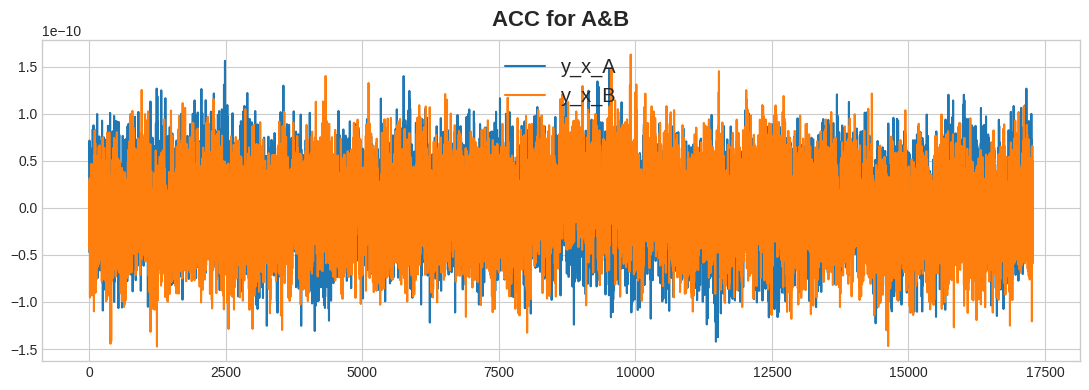

In [8]:
#plot
ax = y_x_A.plot(label='y_x_A')
ax = y_x_B.plot(label='y_x_B')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.set_title("ACC for A&B");

# Plotting cycles

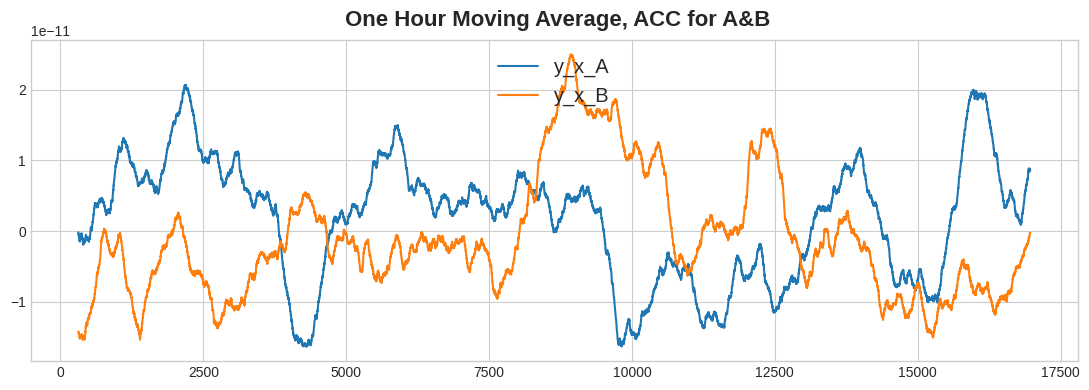

In [9]:
mwindow=25*25#=625 almost 3600/5 = one hour
y_ma_A = y_x_A.rolling(mwindow,center=True).mean()
y_ma_B = y_x_B.rolling(mwindow,center=True).mean()

# Plot
ax = y_ma_A.plot(label='y_x_A')
ax = y_ma_B.plot(label='y_x_B')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.set_title(" One Hour Moving Average, ACC for A&B");



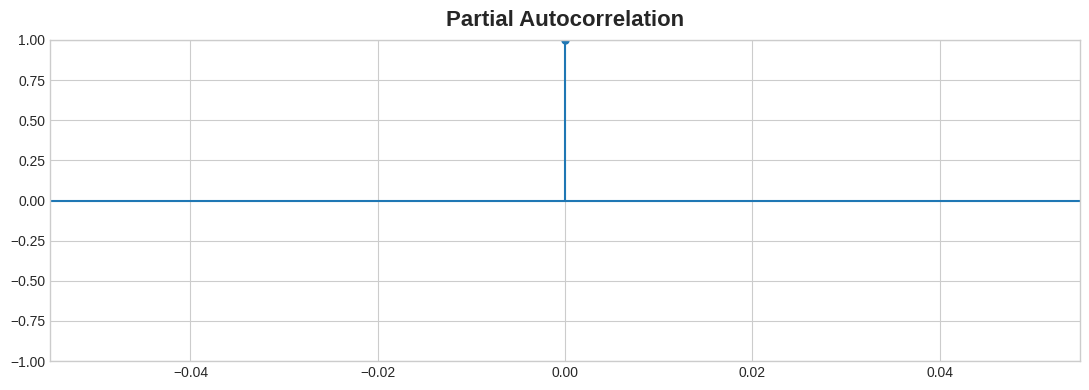

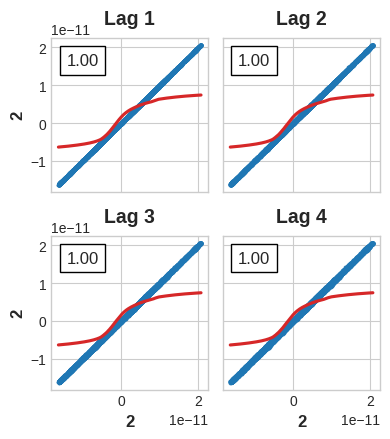

In [10]:
plot_pacf(y_ma_A, lags=4);
plot_lags(y_ma_A, lags=4, nrows=2);

In [11]:
# make features
X = make_lags(y_ma_A, lags=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=30, shuffle=False)
#avoiding nan value error, eliminate first row in X and y
X_train, X_valid, y_train, y_valid = train_test_split(X.iloc[313:17279-311,:], y_ma_A.iloc[313:17279-311], test_size=.3, shuffle=False)
#X_train, X_valid, y_train, y_valid = train_test_split(X.iloc[1:,:], y_x_A.iloc[1:], test_size=.3, shuffle=False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index=X_train.index)
y_pred = pd.Series(model.predict(X_valid), index=X_valid.index)

rmsle_train = mean_squared_error(y_train, y_fit) 
rmsle_valid = mean_squared_error(y_valid, y_pred) 
print(f'Training RMSLE: {rmsle_train:}')
print(f'Validation RMSLE: {rmsle_valid:}')

Training RMSLE: 7.225850500772645e-27
Validation RMSLE: 7.42227780832423e-27


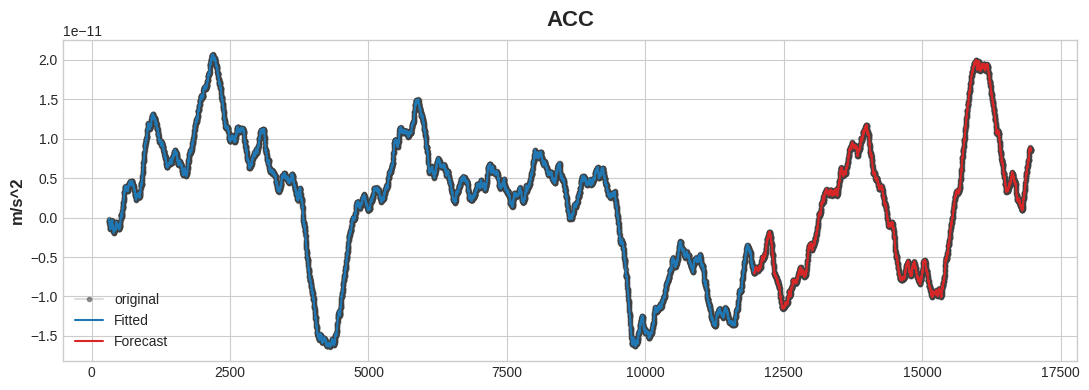

In [13]:
ax = y_ma_A.plot(**plot_params, alpha=0.5,label="original", title="ACC", ylabel="m/s^2")
ax = y_fit.plot(ax=ax, label="Fitted", color='C0')
ax = y_pred.plot(ax=ax, label="Forecast", color='C3')
ax.legend();

In [14]:
X = make_lags(y_x_A, lags=1)

In [15]:
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=30, shuffle=False)
#avoiding nan value error, eliminate first row in X and y
X_train, X_valid, y_train, y_valid = train_test_split(X.iloc[1:,:], y_x_A.iloc[1:], test_size=.3, shuffle=False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index=X_train.index)
y_pred = pd.Series(model.predict(X_valid), index=X_valid.index)

rmsle_train = mean_squared_error(y_train, y_fit) 
rmsle_valid = mean_squared_error(y_valid, y_pred) 
print(f'Training RMSLE: {rmsle_train:}')
print(f'Validation RMSLE: {rmsle_valid:}')

Training RMSLE: 1.3808741012983892e-21
Validation RMSLE: 1.389760741823474e-21


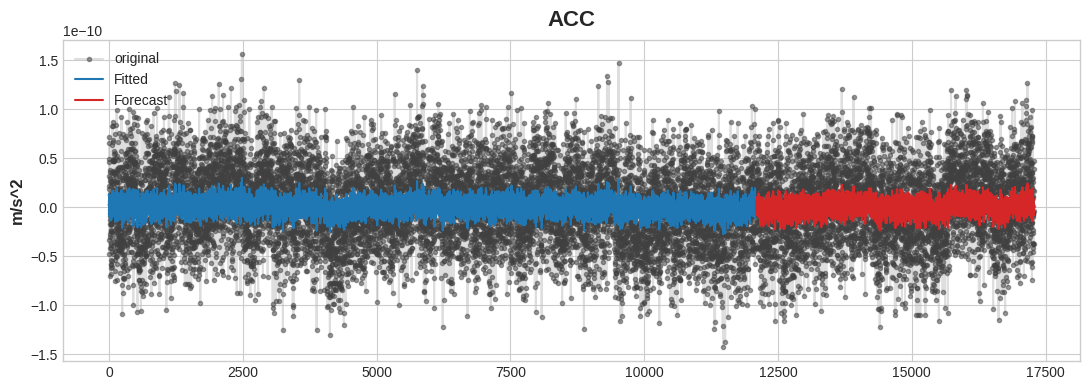

In [16]:
ax = y_x_A.plot(**plot_params, alpha=0.5,label="original", title="ACC", ylabel="m/s^2")
ax = y_fit.plot(ax=ax, label="Fitted", color='C0')
ax = y_pred.plot(ax=ax, label="Forecast", color='C3')
ax.legend();